In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
sys.path.append('../')

In [14]:
date = '2025-01-19'
data = pd.read_csv('../data/oresund/'+date+'.csv')
data = data.drop_duplicates()

In [3]:
#I don't want to see buoys
data = data[(data['Type of mobile']=='Class A') | (data['Type of mobile']=='Class B')]

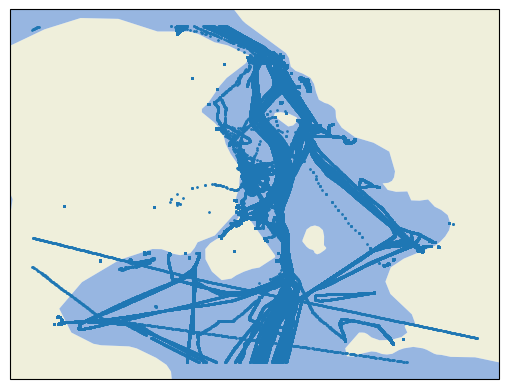

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(data['Longitude'], data['Latitude'], 'o', markersize=1, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

111219518


,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,SOG,COG,Heading,Ship type,Cargo type,Width,Length,Destination
728646,19/01/2025 09:52:13,Class A,111219518,55.579737,12.138432,Under way using engine,91.1,137.9,NaN,Undefined,NaN,NaN,NaN,Unknown
728673,19/01/2025 09:52:14,Class A,111219518,55.579103,12.139437,Under way using engine,92.5,138.1,NaN,Undefined,NaN,NaN,NaN,Unknown
728816,19/01/2025 09:52:21,Class A,111219518,55.577122,12.142525,Under way using engine,97.4,138.8,NaN,Undefined,NaN,NaN,NaN,Unknown
728854,19/01/2025 09:52:22,Class A,111219518,55.576780,12.143052,Under way using engine,98.1,138.9,NaN,Undefined,NaN,NaN,NaN,Unknown
728967,19/01/2025 09:52:26,Class A,111219518,55.575010,12.145715,Under way using engine,102.2,139.9,NaN,Undefined,NaN,NaN,NaN,Unknown


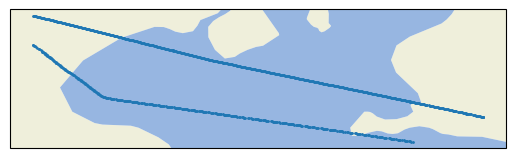

In [8]:
#Finding an interesting MMSI that seems to be not a ship
#Its a SAR Helicopter which only shows by speed and the fact that it travels over ground

#We also see some ships which have forgotten to turn off their AIS
#We can see this by the fact that they are stationary and have been for a long time
#These may be easier to ignore than filter out. Idea would be to use cartopys land/ocean feature (or is that too expensive?)

MMSI_interest = data.iloc[data['Longitude'].argmax()]['MMSI']
temp_data = data[data['MMSI']==MMSI_interest]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(temp_data['Longitude'], temp_data['Latitude'], 'o', markersize=1, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

print(MMSI_interest)
temp_data.head()

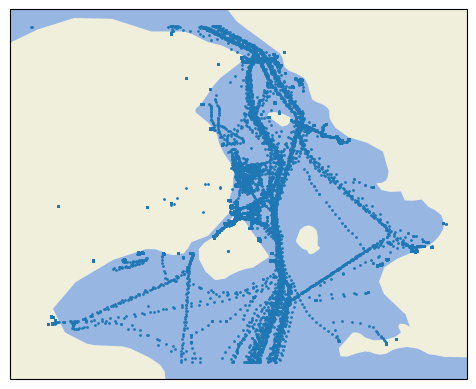

In [15]:
#Plotting the filtered data!
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
temp_data = pd.read_csv('../data/oresund/'+date+'_filtered.csv')
ax.plot(temp_data['Longitude'], temp_data['Latitude'], 'o', markersize=1, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)